In [1]:
import matplotlib.pyplot as plt
import os
from scipy.io import wavfile
from collections import defaultdict, Counter
from scipy import signal
import numpy as np
import librosa
import random as rn
from keras.layers import Dense
from keras import Input
from keras.engine import Model
from keras.utils import to_categorical
from keras.layers import Dense, TimeDistributed, Dropout, Bidirectional, GRU, BatchNormalization, Activation, LeakyReLU, \
    LSTM, Flatten, RepeatVector, Permute, Multiply, Conv2D, MaxPooling2D

In [2]:
from __future__ import division, print_function
import os
import matplotlib.pyplot as plt
import numpy as np
from keras.utils import to_categorical

#for loading and visualizing audio files
import librosa
import librosa.display

#to play audio
import IPython.display as ipd
from os import listdir
from os.path import isfile, join

from matplotlib import pyplot as plt
import scipy.io.wavfile as wav
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras import models
from tensorflow.keras import layers

In [3]:
def audio_to_melSpec(path,pad_len):
    # Load the wave file
    y, sr = librosa.load(path)
    #y = y[::2]
    Y, _ = librosa.effects.trim(y)
    pad2d = lambda a, i: a[:, 0: i] if a.shape[1] > i else np.hstack((a, np.zeros((a.shape[0],i - a.shape[1]))))

    # Extract the MFCC's 
    #melSpec = librosa.feature.mfcc (np.asfortranarray(y), sr=sr, n_mfcc = pad_len)
    melSpec = librosa.feature.melspectrogram(np.asfortranarray(Y), sr=sr, n_mels=pad_len)
    #pad_width = pad_len - melSpec.shape[1]
    melSpec = pad2d(melSpec,32)
    # Pad the MFCCs to obtain a pad_width square image
    #melSpec = np.pad(melSpec, pad_width=((0, 0), (0, pad_width)), mode='constant')
    
    return melSpec
def dir_to_spectrogramMLP(audio_dir):
    #labelDict = {"zero":0,"one":1,"two":2,"three":3,"four":4,"five":5,"six":6,"seven":7,"eight":8,"nine":9,"ten":10}
    #labels = os.listdir(audio_dir)
    specArr = []
    iolabels = []
    for f in os.listdir(audio_dir):
        labelDir = audio_dir+f
        
        # Traversing all the files in the digit folder
        #file_names = [f for f in listdir(labelDir) if isfile(join(labelDir, f)) and '.wav' in f]
        labels = f.split('_')[0]
        
        # Padding the MFCCs to create 32x32 images from MFCCs
        pad_len = 32
        
        # Calculating the MFCCs
        if f.endswith('.wav'):
            audio_path = labelDir 
            
            # MFCCs of the audio file
            melSpec = audio_to_melSpec(audio_path,pad_len)
            specArr.append(melSpec)
            
            # Creating the labels for each audio file
            iolabels.append(labels)
            
    return np.asarray(specArr),to_categorical(iolabels)

In [4]:
#dir_path = '/Users/Krutika/Downloads/asr/free-spoken-digit-dataset-master/train/'
[X_train,Y_train]=dir_to_spectrogramMLP('/Users/Krutika/Downloads/asr/free-spoken-digit-dataset-master/record-training/')
[X_valid,Y_valid]=dir_to_spectrogramMLP('/Users/Krutika/Downloads/asr/free-spoken-digit-dataset-master/record-valid/')
[X_test,Y_test]=dir_to_spectrogramMLP('/Users/Krutika/Downloads/asr/free-spoken-digit-dataset-master/record-testing/')

In [5]:
# Batch size for training
batch_size = 64
# Number of classifier classes
num_classes = 10
# Number od epochs for training
#epochs = 40
# Number of channels
channels = 1
# Model number
#no = 3


X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], X_train.shape[2], channels))
print("Size of the training images: "+str(X_train.shape))


X_valid = X_valid.reshape((X_valid.shape[0], X_valid.shape[1], X_valid.shape[2], channels))
print("Size of the valid images: "+str(X_valid.shape))

# Shape of the input layer for CNN
shapeInput = (X_train.shape[1], X_train.shape[2], channels)

Size of the training images: (2400, 32, 32, 1)
Size of the valid images: (300, 32, 32, 1)


In [6]:
model =models.Sequential()
preprocessing.Resizing(32, 32),
model.add(Conv2D(32, kernel_size=3, activation='relu', input_shape=shapeInput))
model.add(BatchNormalization())
model.add(Conv2D(48, kernel_size=3, activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(120, kernel_size=3, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

#Tensorflow model
#norm_layer = preprocessing.Normalization()
#norm_layer.adapt(spectrogram_ds.map(lambda x, _: x))

#model = models.Sequential([
 #   layers.Input(shape=shapeInput),
  #  preprocessing.Resizing(32, 32), 
   # norm_layer,
   # layers.Conv2D(32, 3, activation='relu'),
#    layers.Conv2D(64, 3, activation='relu'),
 #   layers.MaxPooling2D(),
  #  layers.Dropout(0.25),
   # layers.Flatten(),
    #layers.Dense(128, activation='relu'),
   #layers.Dropout(0.5),
    #layers.Dense(num_classes),
#])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        320       
_________________________________________________________________
batch_normalization (BatchNo (None, 30, 30, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 48)        13872     
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 28, 48)        192       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 26, 26, 120)       51960     
_________________________________________________________________
batch_normalization_2 (Batch (None, 26, 26, 120)       480       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 120)       0

In [7]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
import tensorflow as tf

In [18]:
cp_callback = tf.keras.callbacks.EarlyStopping(verbose=1, patience=2)
history = model.fit(X_train,
          Y_train,
          epochs=50,
          validation_data=(X_valid, Y_valid),
          callbacks=[cp_callback])

Epoch 1/50
75/75 [==============================] - 16s 207ms/step - loss: 0.0636 - accuracy: 0.9867 - val_loss: 0.2622 - val_accuracy: 0.8933
Epoch 2/50
75/75 [==============================] - 16s 211ms/step - loss: 0.0878 - accuracy: 0.9712 - val_loss: 0.7001 - val_accuracy: 0.7767
Epoch 3/50
75/75 [==============================] - 17s 223ms/step - loss: 0.0897 - accuracy: 0.9737 - val_loss: 0.3947 - val_accuracy: 0.8700
Epoch 00003: early stopping


In [19]:
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], X_test.shape[2], channels))

test_loss, test_acc = model.evaluate(X_test, Y_test)

10/10 [==============================] - 0s 30ms/step - loss: 0.3182 - accuracy: 0.9267


In [20]:
print(test_acc)

0.9266666769981384


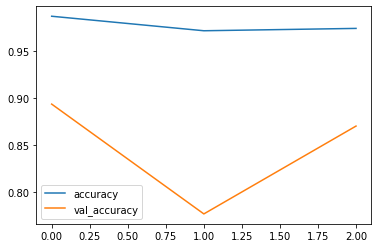

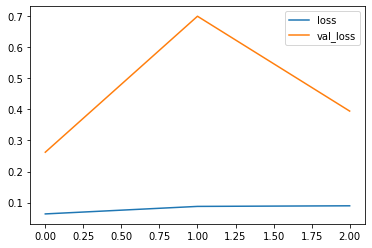

In [25]:
metrics = history.history
plt.plot(history.epoch, metrics['accuracy'], metrics['val_accuracy'])
plt.legend(['accuracy', 'val_accuracy'])
plt.show()
metrics = history.history
plt.plot(history.epoch, metrics['loss'], metrics['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.show()

In [24]:
from sklearn.metrics import classification_report
# Extracting the test data

X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], X_test.shape[2], channels))

# Predicting the digits from model
predictions = np.argmax(model.predict(X_test), axis=-1)

# Comparing predictions for accuracy calculation
reportPrediction = classification_report(Y_test, to_categorical(predictions))
print(reportPrediction)

              precision    recall  f1-score   support

           0       0.97      1.00      0.98        30
           1       0.93      0.93      0.93        30
           2       1.00      0.97      0.98        30
           3       0.96      0.90      0.93        30
           4       1.00      0.83      0.91        30
           5       0.97      1.00      0.98        30
           6       0.68      1.00      0.81        30
           7       0.94      0.97      0.95        30
           8       1.00      0.80      0.89        30
           9       0.96      0.87      0.91        30

   micro avg       0.93      0.93      0.93       300
   macro avg       0.94      0.93      0.93       300
weighted avg       0.94      0.93      0.93       300
 samples avg       0.93      0.93      0.93       300

